In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

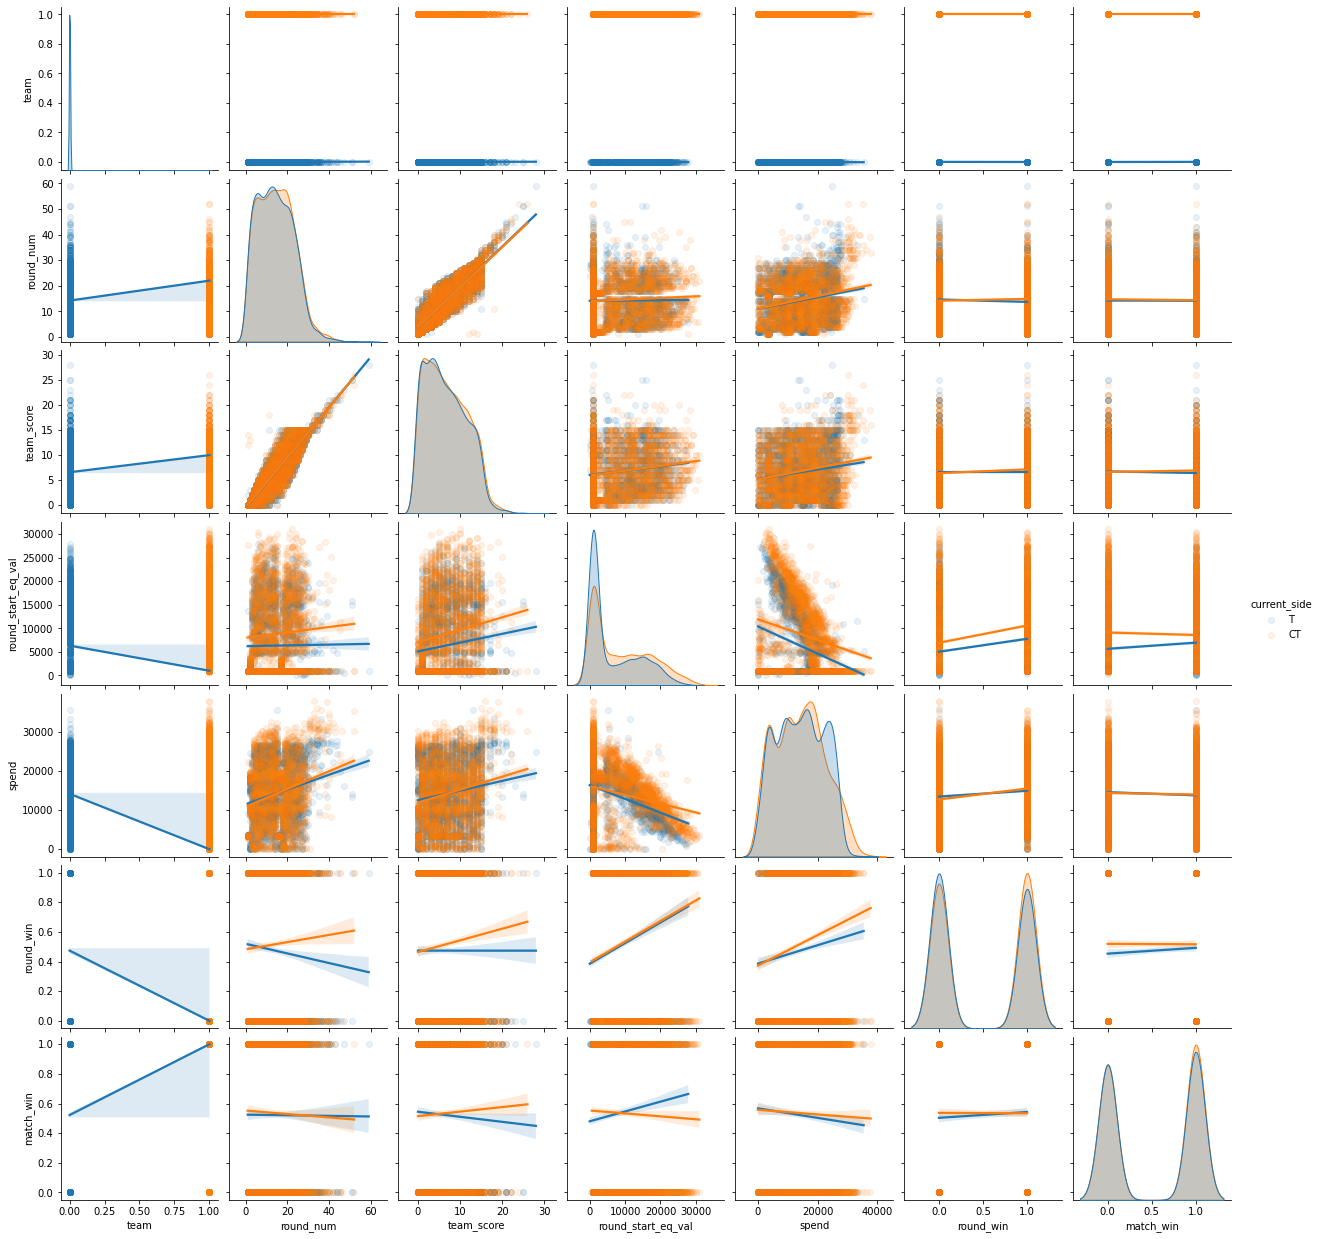

In [22]:
# Explore relevant features in the training data set
df = pd.read_feather('../data/processed/team_score_and_buy__dataset__training.feather')
sns.pairplot(df.sample(5000), hue="current_side", kind='reg', plot_kws={'scatter_kws': {'alpha': 0.1}})
plt.show()

Identify feature Importances

Prepare Data

In [26]:
plt.clf()

import pickle

import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

label_encoder = preprocessing.LabelEncoder()
categorical_value_columns = [
    'buy_type', 'starting_side', 'current_side']

unnecessary_columns = ['match_name', 'client_name', 'round_end_reason', 'round_win', 'team',
                        'map_name',
                        'round_start_eq_val', 'spend', '_data_id', '_match_id']

df.drop(labels=unnecessary_columns, inplace=True, axis=1)

for c in categorical_value_columns:
  df[c] = label_encoder.fit_transform(df[c])

col = df.columns

standscl = preprocessing.StandardScaler()
standscl.fit(df)
standscl.transform(df)
df = standscl.transform(df)
df = pd.DataFrame(df, columns=col)

df['match_win'] = label_encoder.fit_transform(df['match_win'])
X = df.drop('match_win', axis=1)
y = df['match_win']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


<Figure size 432x288 with 0 Axes>

Load Model

In [ ]:

with open('../models/decision_tree_classifier.pkl', 'rb') as f:
        decision_tree_classifier = pickle.load(f)

features = X_train.columns

Plot Importance

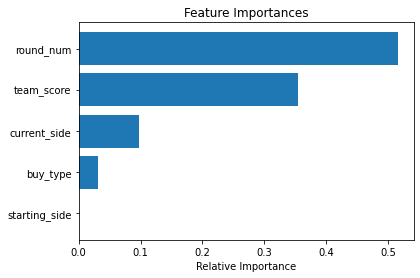

In [33]:
importances = decision_tree_classifier.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()